### Proyek Data Mining - Kelompok 10 - Development of a Predictive Regression Model for House Prices Using Ensemble Stacking 

<!-- Info Proyek -->
<table style="border-collapse: collapse; font-family: Arial, sans-serif; margin-top: 10px;">
    <tr>
        <td style="padding: 6px; font-weight: bold;">Kode Mata Kuliah</td>
        <td style="padding: 6px;">:</td>
        <td style="padding: 6px;">12S3205</td>
    </tr>
    <tr>
        <td style="padding: 6px; font-weight: bold;">Nama Mata Kuliah</td>
        <td style="padding: 6px;">:</td>
        <td style="padding: 6px;">Data Mining</td>
    </tr>
    <tr>
        <td style="padding: 6px; font-weight: bold;">Judul</td>
        <td style="padding: 6px;">:</td>
        <td style="padding: 6px;">Development of a Predictive Regression Model for House Prices Using Ensemble Stacking Techniques</td>
    </tr>
    <tr>
        <td style="padding: 6px; font-weight: bold;">Kelompok</td>
        <td style="padding: 6px;">:</td>
        <td style="padding: 6px;">10</td>
    </tr>
</table>

<!-- Anggota Kelompok -->
<h3 style="text-align:left; font-family: Arial, sans-serif; margin-top: 25px;">Anggota Kelompok</h3>
<table style="border-collapse: collapse; font-family: Arial, sans-serif;">
    <thead style="background-color: #444; color: white;">
        <tr>
            <th style="text-align: left; padding: 8px;">NIM</th>
            <th style="text-align: left; padding: 8px;">Nama</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="padding: 8px;">12S22015</td>
            <td style="padding: 8px;">Angelina Nadeak</td>
        </tr>
        <tr style="background-color: #222; color: white;">
            <td style="padding: 8px;">12S22029</td>
            <td style="padding: 8px;">Jeremy Samosir</td>
        </tr>
        <tr>
            <td style="padding: 8px;">12S22038</td>
            <td style="padding: 8px;">Ade Siahaan</td>
        </tr>
        <tr style="background-color: #222; color: white;">
            <td style="padding: 8px;">12S22052</td>
            <td style="padding: 8px;">Rosari Simanjuntak</td>
        </tr>
    </tbody>
</table>


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv('C:/Users/Asus/Documents/DAMI-Kelompok-11-House-Pricing/Data/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('C:/Users/Asus/Documents/DAMI-Kelompok-11-House-Pricing/Data/house-prices-advanced-regression-techniques/test.csv')

In [2]:
# 1. Struktur dan ukuran dataset
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


In [3]:
# 2. Preview data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 3. Info dan tipe data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# 4. Statistik deskriptif
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# 5. Cek missing values (top 15 paling banyak missing)
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Fitur dengan missing values:\n")
print(missing)

Fitur dengan missing values:

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


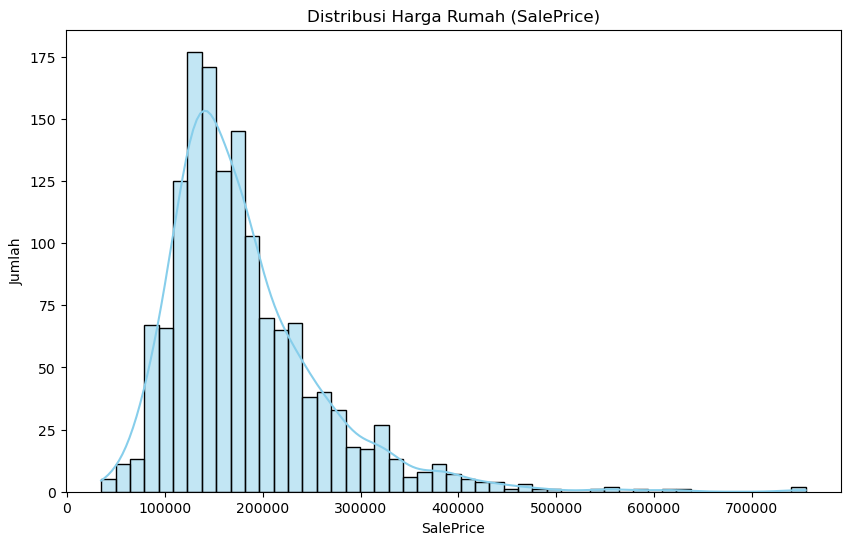

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color='skyblue')
plt.title('Distribusi Harga Rumah (SalePrice)')
plt.xlabel('SalePrice')
plt.ylabel('Jumlah')
plt.show()

In [9]:
# Korelasi terhadap SalePrice
correlation = train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print("Top 10 fitur dengan korelasi tertinggi terhadap SalePrice:\n")
print(correlation.head(10))

Top 10 fitur dengan korelasi tertinggi terhadap SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


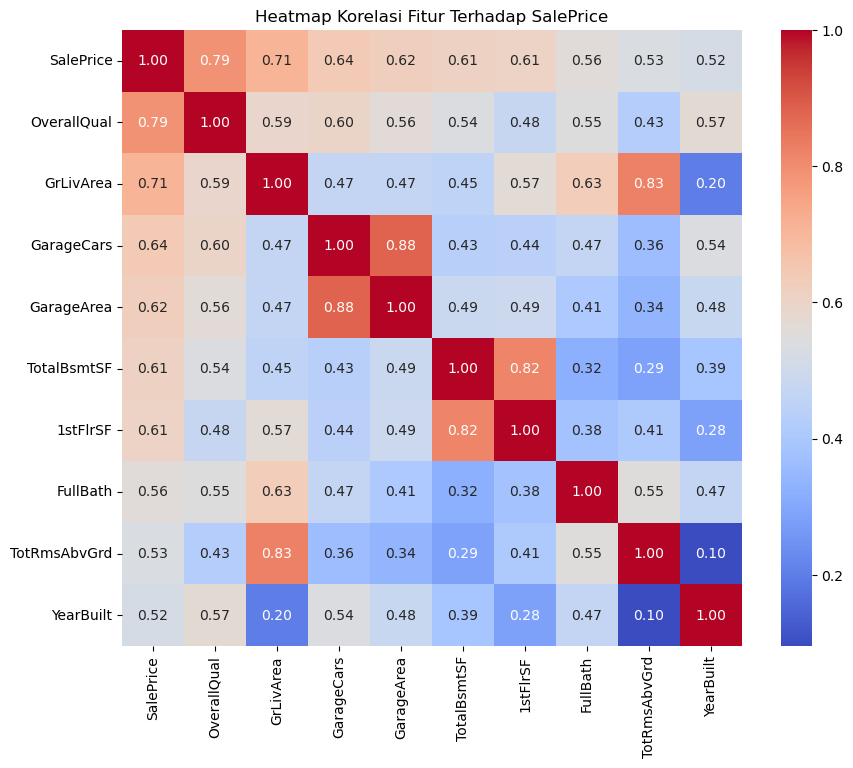

In [10]:
top_corr_features = correlation.head(10).index
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Terhadap SalePrice')
plt.show()